In [1]:
import numpy as np 
import pandas as pd 
import matplotlib                 
import matplotlib.pyplot as plt
import matplotlib.gridspec as mgrid
import seaborn as sns            

import calendar 

import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline

In [2]:
data = pd.read_csv('Border_Crossing_Entry_Data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346733 entries, 0 to 346732
Data columns (total 8 columns):
Port Name    346733 non-null object
State        346733 non-null object
Port Code    346733 non-null int64
Border       346733 non-null object
Date         346733 non-null object
Measure      346733 non-null object
Value        346733 non-null int64
Location     346733 non-null object
dtypes: int64(2), object(6)
memory usage: 21.2+ MB


In [4]:
data.isnull().sum()

Port Name    0
State        0
Port Code    0
Border       0
Date         0
Measure      0
Value        0
Location     0
dtype: int64

In [5]:
data.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524)
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207)
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333)
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996)
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005)


In [7]:
data['Date'] = pd.to_datetime(data['Date'])

In [8]:
borders = data['Border'].unique()
borders

array(['US-Mexico Border', 'US-Canada Border'], dtype=object)

In [9]:
years = data['Date'].map(lambda x: x.year).unique()
years

array([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
       2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998,
       1997, 1996], dtype=int64)

In [10]:
data['year'] = data['Date'].map(lambda x: x.year)

In [159]:
data['year1'] = data['Date'].dt.year

In [156]:
data.year1.value_counts()

2010    16200
2005    16128
2006    16128
2009    16056
2008    16056
2007    16056
2015    15984
2004    15984
2013    15840
2012    15840
2011    15840
2014    15840
2003    15588
2001    14832
1999    14832
1998    14832
1997    14832
2000    14832
1996    14832
2002    14832
2016    13754
2017     9717
2018     9534
2019     2364
Name: year1, dtype: int64

In [11]:
data.year.unique()

array([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
       2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998,
       1997, 1996], dtype=int64)

number of unique elements in "Port Code", "Port Name" and "Location" should coincide.

In [12]:
print('there are {} port names'.format(len(data['Port Name'].unique())))
print('there are {} port codes'.format(len(data['Port Code'].unique())))
print('there are {} different locations'.format(len(data['Location'].unique())))

there are 116 port names
there are 117 port codes
there are 224 different locations


In [13]:
ports = data[['Port Name','Port Code']].drop_duplicates()

In [14]:
ports['Port Name'].value_counts()

Eastport                      2
Whitlash                      1
Opheim                        1
Progreso                      1
Highgate Springs-Alburg       1
Blaine                        1
St. John                      1
Alcan                         1
Andrade                       1
Danville                      1
Houlton                       1
Laurier                       1
Sault Sainte Marie            1
Van Buren                     1
Del Rio                       1
Del Bonita                    1
Limestone                     1
Grand Portage                 1
Piegan                        1
Norton                        1
Beecher Falls                 1
Presidio                      1
Champlain-Rouses Point        1
Whitetail                     1
Tornillo-Fabens               1
Sasabe                        1
Morgan                        1
Richford                      1
Trout River                   1
Brownsville                   1
                             ..
Internat

In [163]:
ports[ports['Port Name'].duplicated(keep = False)]

,Port Name,Port Code
29,Eastport,3302
217,Eastport,103


In [16]:
data.iloc[[29,217]]

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,year
29,Eastport,Idaho,3302,US-Canada Border,2019-03-01,Trains,101,POINT (-116.18027999999998 48.99944),2019
217,Eastport,Maine,103,US-Canada Border,2019-03-01,Trucks,165,POINT (-66.99387 44.90357),2019


In [17]:
data.loc[29, 'Port Name'] = 'Eastpost, ID'

In [18]:
data.loc[29, 'Port Name']

'Eastpost, ID'

or, we can use the below approach - long one

data.loc[(data['Port Name '] == 'Eastport') & (data['State'] == 'Idaho'), 'Port Name'] = 'Eastpost, ID'

In [19]:
locs = data[['Location','Port Code']]
locs = locs.drop_duplicates()
print('there are {} number of differnt Location and Post code'.format(len(locs)))

there are 229 number of differnt Location and Post code


In [20]:
ls = locs['Port Code'].value_counts()
pts = locs['Location'].value_counts()

print('')
print('Port codes and # of locations:')
print(ls.head(10))
print('')
print('Locations and # of ports:')
print(pts.head(10))


Port codes and # of locations:
3015    3
3020    3
2303    2
3421    2
3408    2
3409    2
3410    2
2305    2
3413    2
3414    2
Name: Port Code, dtype: int64

Locations and # of ports:
POINT (-95.81074 48.77518)              2
POINT (-117.62999999999998 49)          2
POINT (-73.44253 44.990010000000005)    2
POINT (-109.67761 48.54863)             2
POINT (-117.83 49)                      2
POINT (-131.65 55.34)                   1
POINT (-72.67832000000001 44.98588)     1
POINT (-96.8 49)                        1
POINT (-102.39634 48.89848)             1
POINT (-119.63537999999998 48.82366)    1
Name: Location, dtype: int64


In [25]:
locs['Port Code'].value_counts().max()

3

There are 229 pairs of ports and locations but only 224 unique locations. So it seems that there are some ports (with different codes and names) sharing the same location.

In [21]:
len(pts)

224

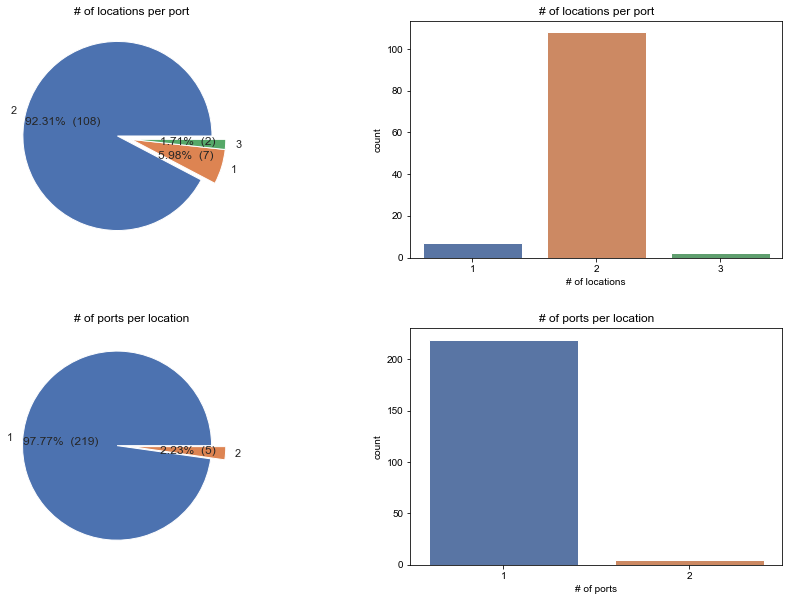

In [23]:
f,ax = plt.subplots(ncols=2, nrows=2, figsize=(15,10))
sns.set(style = "darkgrid")

# Pie plots
# This function generates autopct, for displaying both the percent value and the original value.
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

ls.value_counts().plot.pie(explode = [0.15,0,0],
                           autopct = make_autopct(ls.value_counts().values),
                           ax = ax[0,0])
ax[0,0].set(title = '# of locations per port', ylabel = '')
pts.value_counts().plot.pie(explode = [0.15,0], 
                            autopct = make_autopct(pts.value_counts().values), 
                            ax = ax[1,0])
ax[1,0].set(title = '# of ports per location', ylabel = '')

# Countplots using seaborn
ax[0,1] = sns.countplot(ls, ax=ax[0,1])
ax[0,1].set(title = '# of locations per port', xlabel = '# of locations')
ax[1,1] = sns.countplot(pts, ax=ax[1][1])
ax[1,1].set(title = '# of ports per location', xlabel = '# of ports')

plt.subplots_adjust(
    wspace =  0.25,     # the amount of width reserved for blank space between subplots
    hspace = 0.3 # the amount of height reserved for white space between subplots
)

The majority of the ports have two locations, and most of the locations are unique to a port, excepting 5 of them.

Which ports are sharing which locations?



In [32]:
rpt = pts[pts.values > 1].index
rpt_locs = locs[locs['Location'].isin(rpt)]
rpt_locs

,Location,Port Code
4,POINT (-73.44253 44.990010000000005),715
15,POINT (-109.67761 48.54863),3323
79,POINT (-95.81074 48.77518),3426
92,POINT (-95.81074 48.77518),3425
302,POINT (-109.67761 48.54863),3325
4212,POINT (-73.44253 44.990010000000005),706
19150,POINT (-117.62999999999998 49),3015
19267,POINT (-117.83 49),3020
22183,POINT (-117.62999999999998 49),3020
22492,POINT (-117.83 49),3015


The following pairs of ports (by codes) are sharing locations. We see that 3020 (Frontier, Washington) and 3015 (Boundary, Washington) actually share 2 locations.

In [164]:
rpt

Index(['POINT (-95.81074 48.77518)', 'POINT (-117.62999999999998 49)',
       'POINT (-73.44253 44.990010000000005)', 'POINT (-109.67761 48.54863)',
       'POINT (-117.83 49)'],
      dtype='object')

In [165]:
l

,Port Code
Location,
POINT (-73.44253 44.990010000000005),715
POINT (-109.67761 48.54863),3323
POINT (-95.81074 48.77518),3426
POINT (-95.81074 48.77518),3425
POINT (-109.67761 48.54863),3325
POINT (-73.44253 44.990010000000005),706
POINT (-117.62999999999998 49),3015
POINT (-117.83 49),3020
POINT (-117.62999999999998 49),3020


In [36]:
l = rpt_locs.set_index('Location')
pairs = [l.loc[x].values.flatten().tolist() for x in rpt]
print(pairs)

[[3426, 3425], [3015, 3020], [715, 706], [3323, 3325], [3020, 3015]]


In [39]:
data.iloc[[715, 706]]

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,year
715,Del Rio,Texas,2302,US-Mexico Border,2019-03-01,Trucks,6706,POINT (-100.89639 29.3625),2019
706,Raymond,Montana,3301,US-Canada Border,2019-03-01,Personal Vehicle Passengers,3095,POINT (-104.575 48.99667),2019


In [40]:
data.Measure.unique()

array(['Trucks', 'Rail Containers Full', 'Trains',
       'Personal Vehicle Passengers', 'Bus Passengers',
       'Truck Containers Empty', 'Rail Containers Empty',
       'Personal Vehicles', 'Buses', 'Truck Containers Full',
       'Pedestrians', 'Train Passengers'], dtype=object)

In [41]:
people = data[data['Measure'].isin(['Personal Vehicle Passengers', 'Bus Passengers','Pedestrians', 'Train Passengers'])]
vehicles = data[data['Measure'].isin(['Trucks', 'Rail Containers Full','Truck Containers Empty', 'Rail Containers Empty',
       'Personal Vehicles', 'Buses', 'Truck Containers Full'])]

In [42]:
people_borders = people[['Border','Value']].groupby('Border').sum()
people_borders

,Value
Border,
US-Canada Border,1631864476
US-Mexico Border,5018273234


In [166]:
values = people_borders.values.flatten()
labels = people_borders.index

fig = go.Figure(data =[go.Pie(labels = labels, values = values)])
fig.update(layout_title_text='Total inbound persons, since 1996')
fig.show()

In [52]:
p = people[['Date','Border', 'Value']].set_index('Date')
p = p.groupby([p.index.year, 'Border']).sum()
p.head()

Value
Date Border                     
1996 US-Canada Border  105762398
     US-Mexico Border  207586832
1997 US-Canada Border   97570223
     US-Mexico Border  261050472
1998 US-Canada Border   93097261

In [170]:
val_MEX = p.loc(axis = 0)[:, 'US-Mexico Border'].values.flatten().tolist()
val_CAN = p.loc(axis = 0)[:, 'US-Canada Border'].values.flatten().tolist()
yrs = p.unstack(level =1).index.values


In [182]:
val_MEX

Date
1996    207586832
1997    261050472
1998    274125727
1999    293109831
2000    290368364
2001    263992857
2002    253240235
2003    246120241
2004    242422023
2005    235084672
2006    228715214
2007    217482762
2008    206301125
2009    184765055
2010    168347492
2011    153706850
2012    159061181
2013    166151041
2014    173260603
2015    181281186
2016    185155513
2017    187965778
2018    192913686
2019     46064494
Name: US-Mexico Border, dtype: int64

In [168]:


fig = go.Figure(go.Bar(x = yrs, y = val_MEX, name='US-Mexico Border'))
fig.add_trace(go.Bar(x = yrs, y = val_CAN, name='US-Canada Border'))

fig.update_layout(title = 'Total inbounds (people), by border and years', barmode='stack', xaxis={'categoryorder':'category ascending'})
fig.show()

In [76]:
vals= p.unstack().unstack().Value
val_MEX = vals['US-Mexico Border']
val_CAN = vals['US-Canada Border']
val_TOT = vals_MEX + vals_CAN
val_TOT


Date
1996    313349230
1997    358620695
1998    367222988
1999    387683500
2000    386145273
2001    344426635
2002    327779329
2003    313212475
2004    310638010
2005    302290484
2006    295980049
2007    280248288
2008    267862783
2009    241390862
2010    228232869
2011    216026304
2012    224198885
2013    231587189
2014    235908812
2015    236173238
2016    237655762
2017    240702509
2018    246945926
2019     55855615
dtype: int64

In [175]:
# Unstack the Data Frame
vals = p.unstack().Value
val_MEX = vals['US-Mexico Border']
val_CAN = vals['US-Canada Border']
val_TOT = val_MEX + val_CAN
growth_MEX = val_MEX.diff().dropna()/val_MEX.values[:-1]*100
growth_CAN = val_CAN.diff().dropna()/val_CAN.values[:-1]*100
growth_TOT = val_TOT.diff().dropna()/val_TOT.values[:-1]*100

yrs = vals.index.values


In [176]:
val_MEX

Date
1996    207586832
1997    261050472
1998    274125727
1999    293109831
2000    290368364
2001    263992857
2002    253240235
2003    246120241
2004    242422023
2005    235084672
2006    228715214
2007    217482762
2008    206301125
2009    184765055
2010    168347492
2011    153706850
2012    159061181
2013    166151041
2014    173260603
2015    181281186
2016    185155513
2017    187965778
2018    192913686
2019     46064494
Name: US-Mexico Border, dtype: int64

In [89]:
# Bar chart 
# We drop the values for 2019 as there are data only until april
fig = go.Figure(go.Bar(x = yrs, y = growth_MEX.values[:-1], name='US-Mexico Border'))
fig.add_trace(go.Bar(x = yrs, y = growth_CAN.values[:-1], name='US-Canada Border'))
fig.add_trace(go.Line(x = yrs, y = growth_TOT.values[:-1], name='Total'))

fig.update_layout(title = 'Border transit annual growth (people), by border and years', 
                  barmode='group', 
                  xaxis={'categoryorder':'category ascending'},
                  yaxis=go.layout.YAxis(
                      title=go.layout.yaxis.Title(
                      text="Annual growth (%)",
                      font=dict(                      
                      size=18,
                      color="#7f7f7f")
            
        )
    )
                 
                 )
fig.show()


#### How do people cross the borders?

In [92]:
m = people[['Date','Measure','Value']].set_index('Date')

m.head()

,Measure,Value
Date,,
2019-03-01,Personal Vehicle Passengers,16377
2019-03-01,Bus Passengers,1054
2019-03-01,Personal Vehicle Passengers,509
2019-03-01,Pedestrians,79
2019-03-01,Pedestrians,3


In [93]:
m = m.groupby([m.index.year,'Measure']).sum()
m.head(10)

Value
Date Measure                               
1996 Bus Passengers                 5813778
     Pedestrians                   34717351
     Personal Vehicle Passengers  272593220
     Train Passengers                224881
1997 Bus Passengers                 6896919
     Pedestrians                   44461186
     Personal Vehicle Passengers  307001980
     Train Passengers                260610
1998 Bus Passengers                 7608484
     Pedestrians                   45060023

In [96]:
measures = ['Personal Vehicle Passengers', 'Bus Passengers','Pedestrians', 'Train Passengers']
yrs = m.unstack().index.values
yrs

array([1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019], dtype=int64)

In [100]:
fig = go.Figure(data = [go.Bar(x = yrs, y = m.loc(axis=0)[:, mes].values.flatten().tolist(), name = mes) for mes in measures ])
    
fig.update_layout(title = 'Total inbounds (people), by measure and years', barmode='stack', xaxis={'categoryorder':'category ascending'})
fig.show()

In [98]:
people_measure = people[['Measure','Value']].groupby('Measure').sum()
values = people_measure.values.flatten()
labels = people_measure.index
fig = go.Figure(data=[go.Pie(labels = labels, values=values)])
fig.update(layout_title_text='Total inbound persons, since 1996')
fig.show()

In [99]:
people_measure

,Value
Measure,
Bus Passengers,142330871
Pedestrians,1044218114
Personal Vehicle Passengers,5457391275
Train Passengers,6197450


In [101]:
# Take the values and set the date as index
mb = people[['Date','Border','Measure','Value']].set_index('Date')

# Group by years and border
mb = mb.groupby([mb.index.year,'Border','Measure']).sum()

# Bar chart, US-Canada Border

fig = go.Figure(data = [go.Bar(x = yrs, y = mb.loc(axis=0)[:,'US-Canada Border', mes].values.flatten().tolist(), name = mes) for mes in measures ])
fig.update_layout(title = 'US-Canada inbounds (people), by measure and years', barmode='stack', xaxis={'categoryorder':'category ascending'})
fig.show()

In [102]:
# Bar chart, US-Canada Border

fig = go.Figure(data = [go.Bar(x = yrs, y = mb.loc(axis=0)[:,'US-Mexico Border', mes].values.flatten().tolist(), name = mes) for mes in measures ])
fig.update_layout(title = 'US-Mexico inbounds (people), by measure and years', barmode='stack', xaxis={'categoryorder':'category ascending'})
fig.show()

Interestingly, the number of pedestrians crossing the US-Mexico Border seems to be almost constant in time, compared to the number of Personal Vehicle Passengers, which learly sets the trend

C:\Users\SatinderSingh\AppData\Local\Continuum\anaconda4\lib\site-packages\matplotlib\figure.py:445: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



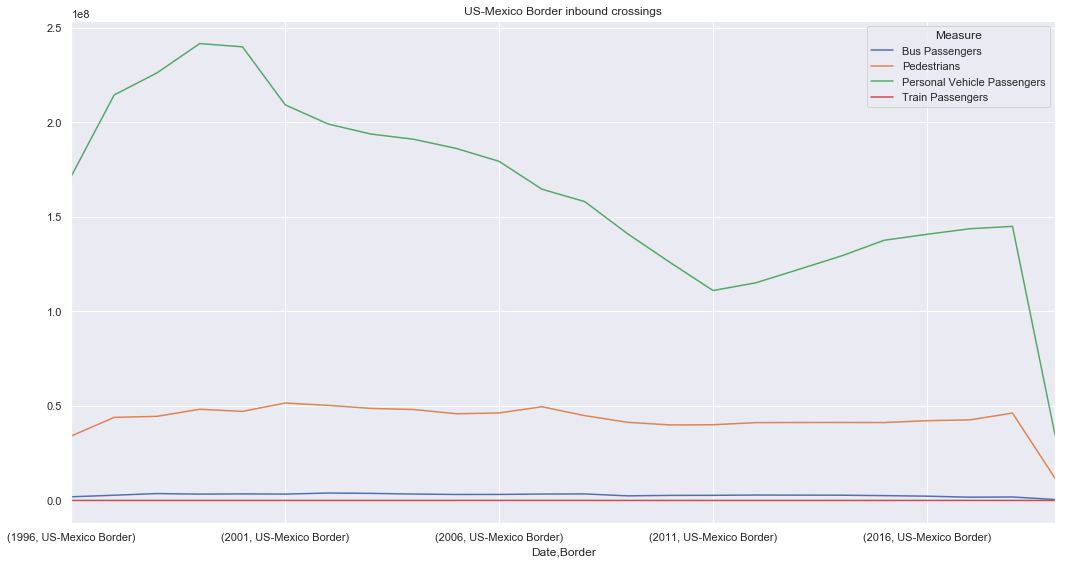

In [103]:
sns.set(rc={'figure.figsize':(15, 8)})
fig,ax = plt.subplots()
mb.loc(axis=0)[:,'US-Mexico Border', :].unstack().Value.plot(title='US-Mexico Border inbound crossings',ax=ax)
fig.tight_layout()
fig.show()

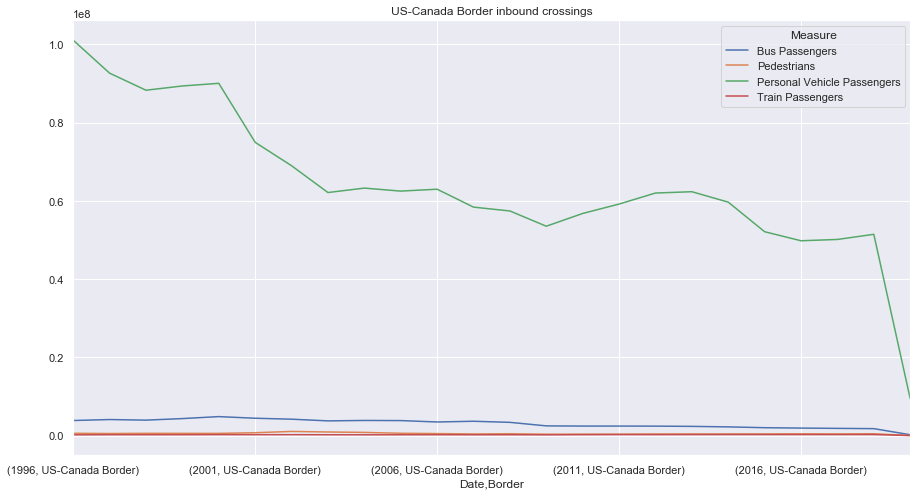

In [104]:
mb.loc(axis=0)[:,'US-Canada Border', :].unstack().Value.plot(title='US-Canada Border inbound crossings')
plt.show()

C:\Users\SatinderSingh\AppData\Local\Continuum\anaconda4\lib\site-packages\matplotlib\figure.py:445: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



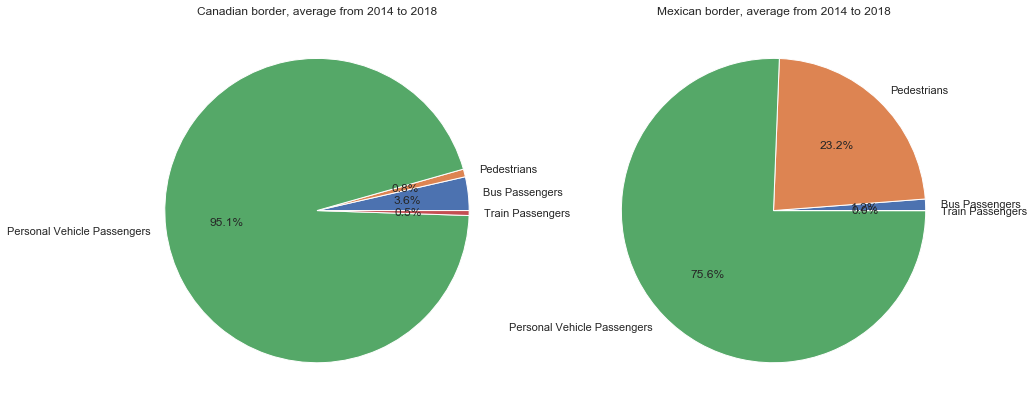

In [105]:
start_year = 2014
end_year = 2018

m = people[['Date','Border','Measure','Value']].set_index('Date')

# Group by years and measure
m = m.groupby([m.index.year,'Border', 'Measure']).sum()

m_can = m.loc(axis=0)[start_year:end_year,'US-Canada Border'].groupby('Measure').mean()
m_mex = m.loc(axis=0)[start_year:end_year,'US-Mexico Border'].groupby('Measure').mean()

# plotting, pie charts
f,ax = plt.subplots(ncols=2, nrows=1)

m_can['Value'].plot.pie( ax = ax[0], autopct = '%1.1f%%')
m_mex['Value'].plot.pie( ax = ax[1], autopct = '%1.1f%%')

ax[0].set(title = 'Canadian border, average from {} to {}'.format(start_year,end_year), ylabel = '')
ax[1].set(title = 'Mexican border, average from {} to {}'.format(start_year,end_year), ylabel = '')
f.show()

In [106]:
# Inbounds by years and Measure, since 1996
d = data[['Date','Measure','Value']].set_index('Date')

year_measure_df = d.pivot_table('Value', index = d.index.year, 
                                columns = 'Measure',
                                aggfunc = 'sum')
year_measure_df


Measure,Bus Passengers,Buses,Pedestrians,Personal Vehicle Passengers,Personal Vehicles,Rail Containers Empty,Rail Containers Full,Train Passengers,Trains,Truck Containers Empty,Truck Containers Full,Trucks
Date,,,,,,,,,,,,
1996,5813778,292789,34717351,272593220,101960373,268134,472219,224881,38966,1599429,3124031,8685180
1997,6896919,389969,44461186,307001980,119003203,354288,620145,260610,40541,1920118,3708600,9516639
1998,7608484,436803,45060023,314295857,120451297,513721,1079074,258624,41116,2405012,6223216,10217477
1999,7725590,469496,48801064,330891505,126689655,611927,1376950,265341,38949,2768834,7641245,11176168
2000,8338859,460056,47677158,329841500,129202573,684988,1481674,287756,40555,2747769,7684947,11573707
2001,7823231,457697,52253906,284076951,123834970,764043,1597954,272547,41046,2936782,7942907,11081868
2002,8139017,470321,51362762,268007308,122388232,774094,1653204,270242,40579,2913657,8340836,11342566
2003,7526855,475676,49604705,255834018,118313556,806863,1668857,246897,41911,2626413,8273120,10973782
2004,7278897,424729,48916697,254206275,121794376,835832,1790382,236141,41111,2622197,8666091,11407570


In [107]:
year_measure_df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

Measure,Bus Passengers,Buses,Pedestrians,Personal Vehicle Passengers,Personal Vehicles,Rail Containers Empty,Rail Containers Full,Train Passengers,Trains,Truck Containers Empty,Truck Containers Full,Trucks
Measure,,,,,,,,,,,,
Bus Passengers,1,0.98,0.79,0.88,0.87,-0.24,-0.047,0.41,0.78,0.2,0.29,0.52
Buses,0.98,1,0.86,0.85,0.89,-0.12,0.07,0.48,0.79,0.32,0.41,0.6
Pedestrians,0.79,0.86,1,0.72,0.94,0.3,0.47,0.77,0.88,0.7,0.71,0.89
Personal Vehicle Passengers,0.88,0.85,0.72,1,0.89,-0.36,-0.16,0.45,0.73,0.16,0.14,0.5
Personal Vehicles,0.87,0.89,0.94,0.89,1,0.071,0.27,0.73,0.92,0.52,0.54,0.82
Rail Containers Empty,-0.24,-0.12,0.3,-0.36,0.071,1,0.94,0.6,0.21,0.83,0.78,0.62
Rail Containers Full,-0.047,0.07,0.47,-0.16,0.27,0.94,1,0.66,0.36,0.88,0.92,0.74
Train Passengers,0.41,0.48,0.77,0.45,0.73,0.6,0.66,1,0.81,0.83,0.7,0.93
Trains,0.78,0.79,0.88,0.73,0.92,0.21,0.36,0.81,1,0.53,0.56,0.85


#### Crossings by states:

In [110]:
# Incoming people by state and type of vehicle, since 1996

PStateVehicle_df = people.pivot_table(values = 'Value', index = 'State',
                                     columns= 'Measure', aggfunc= 'sum')
PStateVehicle_df


Measure,Bus Passengers,Pedestrians,Personal Vehicle Passengers,Train Passengers
State,,,,
Alaska,3668090,46029,5557002,1416788
Arizona,4375091,193379378,466627956,51487
California,22686318,398376422,1349044241,67522
Idaho,236285,49832,10711892,50341
Maine,1058432,1452920,135577872,56135
Michigan,16878527,253245,410333316,670671
Minnesota,1434365,520305,54669078,418906
Montana,602041,168492,31537382,40923
New Mexico,393143,6860216,38432430,0


In [111]:
rest = PStateVehicle_df[PStateVehicle_df.sum(axis=1)  < PStateVehicle_df.sum().sum()*0.04].sum().rename('Rest')
rest

Measure
Bus Passengers                  12738660
Pedestrians                      9489922
Personal Vehicle Passengers    375949090
Train Passengers                 2192710
Name: Rest, dtype: int64

In [185]:
 PStateVehicle_df.sum()

Measure
Bus Passengers                  142330871
Pedestrians                    1044218114
Personal Vehicle Passengers    5457391275
Train Passengers                  6197450
dtype: int64

In [112]:
PStateVehicle_df.sum(axis=1)

State
Alaska            10687909
Arizona          664433912
California      1770174503
Idaho             11048350
Maine            138145359
Michigan         428135759
Minnesota         57042654
Montana           32348838
New Mexico        45685789
New York         530521680
North Dakota      37373883
Texas           2537979030
Vermont           68037600
Washington       318522444
dtype: int64

In [115]:
PStateVehicle_df.sum().sum()*.04

266005508.4

In [118]:
t = PStateVehicle_df[PStateVehicle_df.sum(axis=1)  > PStateVehicle_df.sum().sum()*0.04]
t.append(rest)

Measure,Bus Passengers,Pedestrians,Personal Vehicle Passengers,Train Passengers
State,,,,
Arizona,4375091,193379378,466627956,51487
California,22686318,398376422,1349044241,67522
Michigan,16878527,253245,410333316,670671
New York,35144267,8218354,485498317,1660742
Texas,40548824,432633524,2064627838,168844
Washington,9959184,1867269,305310517,1385474
Rest,12738660,9489922,375949090,2192710


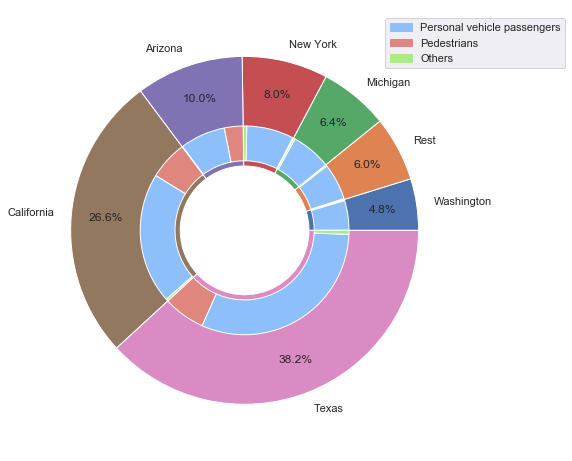

In [119]:
rest = PStateVehicle_df[PStateVehicle_df.sum(axis=1)  < PStateVehicle_df.sum().sum()*0.04].sum().rename('Rest')

t = PStateVehicle_df[PStateVehicle_df.sum(axis=1)  > PStateVehicle_df.sum().sum()*0.04]
t = t.append(rest)
# Sort them by total flux
t = t.iloc[np.argsort(t.sum(axis=1)).values]
# Combine Train and bus passagners in "others"
t['Other']=t['Bus Passengers'] + t['Train Passengers']
t = t.drop(['Bus Passengers', 'Train Passengers'], axis=1)

# Plot
fig, ax = plt.subplots()

size = 0.4

a= t.sum(axis=1).plot.pie(radius = 1,
       wedgeprops=dict(width=size+0.23, edgecolor='w'), ax = ax, autopct = '%1.1f%%', pctdistance= 0.8)

b=pd.Series(t.values.flatten()).plot.pie(radius = 1- size,colors = ['#DF867E','#8DC0FB','#A9EE84'],
       wedgeprops=dict(width=size-0.2, edgecolor='w'), ax=ax, labels = None)


ax.set(ylabel=None)
red_patch = matplotlib.patches.Patch(color='#DF867E', label='Pedestrians')
blue_patch = matplotlib.patches.Patch(color='#8DC0FB', label='Personal vehicle passengers')
green_patch = matplotlib.patches.Patch(color='#A9EE84', label='Others')
plt.legend(handles=[blue_patch,red_patch, green_patch], loc='best', bbox_to_anchor=(0.75, 0.5, 0.5, 0.5))

plt.show()

C:\Users\SatinderSingh\AppData\Local\Continuum\anaconda4\lib\site-packages\matplotlib\figure.py:445: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



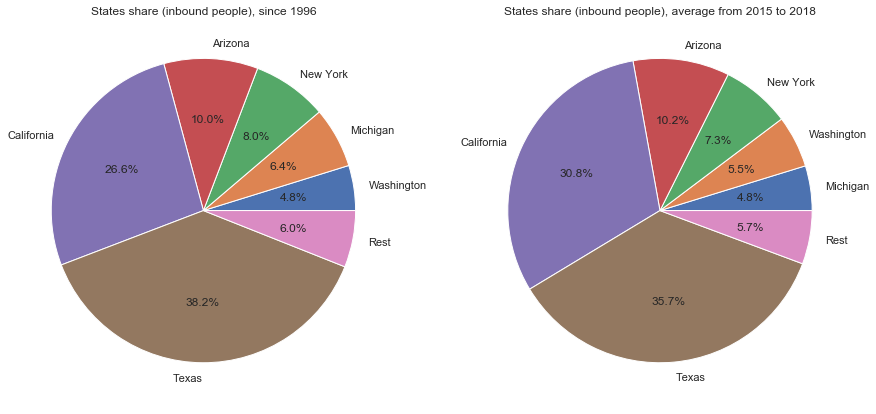

In [120]:
start_year = 2015
end_year = 2018

# Group by years and states
p_states = people[['Date','State','Value']].set_index('Date')
p_states = p_states.groupby([p_states.index.year, 'State']).sum()
# Select date range and compute mean
p_states = p_states.loc(axis=0)[start_year:end_year,:].groupby('State').mean()
# Sort, for nice visualization
p_states = p_states['Value'].sort_values()
# Take only states with more than 4% of share 
rest = p_states[p_states < p_states.sum()*.04].sum()
p_states = p_states[p_states > p_states.sum()*.04].append(pd.Series({'Rest' : rest}))

# Same for all years:
p_states_tot = people[['State','Value']].groupby('State').sum()
p_states_tot = p_states_tot['Value'].sort_values()
rest_tot = p_states_tot[p_states_tot < p_states_tot.sum()*.04].sum()

p_states_tot = p_states_tot[p_states_tot > p_states_tot.sum()*.04].append(pd.Series({'Rest' : rest_tot}))


# plotting, pie charts
f,ax = plt.subplots(ncols=2, nrows=1)

p_states_tot.plot.pie( ax = ax[0], autopct = '%1.1f%%')
p_states.plot.pie( ax = ax[1], autopct = '%1.1f%%')

ax[0].set(title = 'States share (inbound people), since 1996', ylabel = '')
ax[1].set(title = 'States share (inbound people), average from {} to {}'.format(start_year,end_year), ylabel = '')
f.show()


How are the crossings distributed among ports?

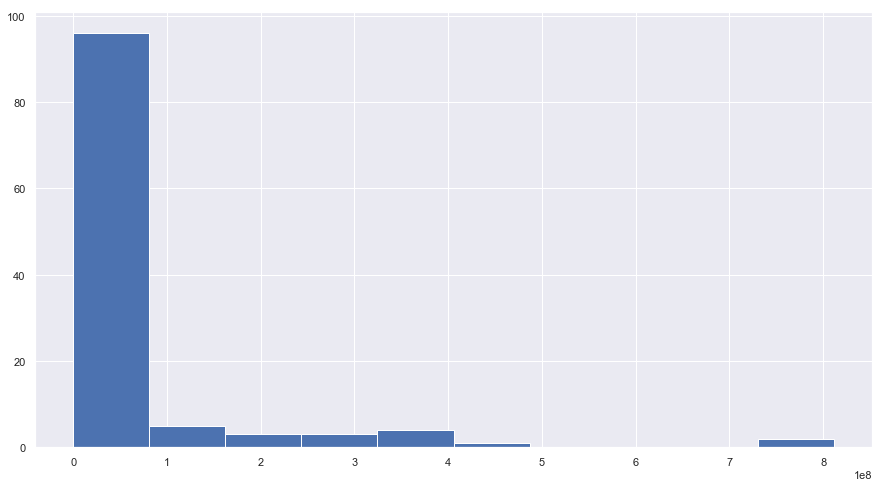

In [121]:
p_ports = people[['Port Name','Value']].groupby('Port Name').sum().Value.sort_values(ascending = False)
p_ports.hist()

plt.show()

The vast majority of ports have had less than 100M crossings, whereas a very few of them have a lot. Border crossings are concentrated in few ports among the 114 of them. Which are the most transited?

In [122]:
num_p = 10

pctg = p_ports.head(num_p).sum()/p_ports.sum()*100

print('The {} most transited ports are:'.format(num_p))
print(p_ports.head(num_p))
print('')
print ('The {} most transited ports (out of 117) take {:.2f} % of all persons crossings into the US.'.format(num_p, pctg))

The 10 most transited ports are:
Port Name
San Ysidro               811558760
El Paso                  807157251
Laredo                   431361385
Hidalgo                  403481152
Calexico                 398247654
Brownsville              366182785
Buffalo-Niagara Falls    350600807
Nogales                  305468724
Otay Mesa                289577993
Detroit                  274123902
Name: Value, dtype: int64

The 10 most transited ports (out of 117) take 66.73 % of all persons crossings into the US.


In [125]:
people_crossing_series = people[['Date','Value']].groupby('Date').sum()
people_crossing_series_CAN = people[people['Border'] == 'US-Canada Border'][['Date','Value']].groupby('Date').sum()
people_crossing_series_MEX = people[people['Border'] == 'US-Mexico Border'][['Date','Value']].groupby('Date').sum()

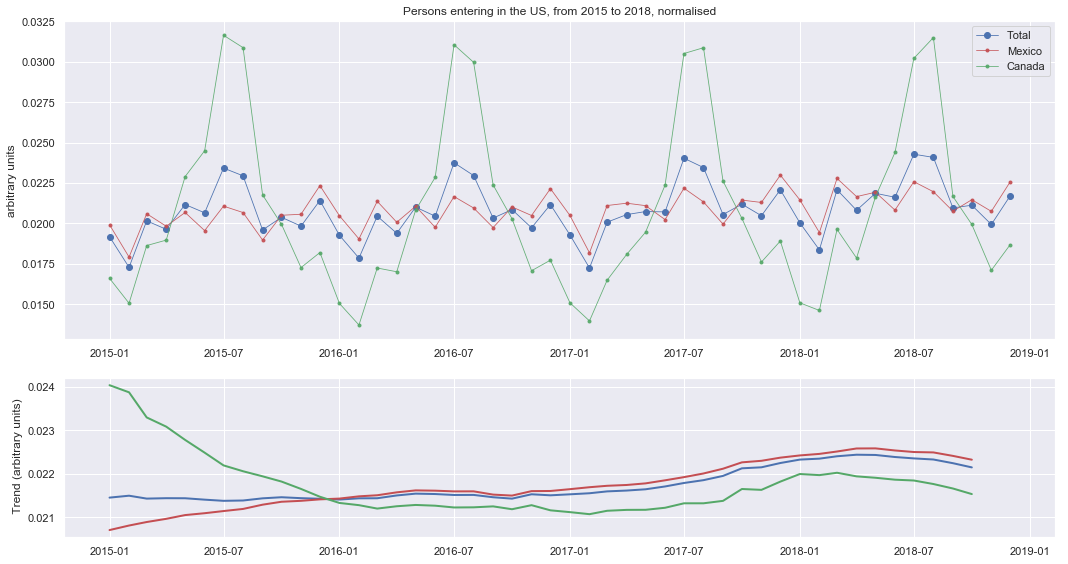

In [128]:
fig = plt.figure()

grid = mgrid.GridSpec(nrows=2, ncols=1, height_ratios=[2, 1])

seas = fig.add_subplot(grid[0])
trend = fig.add_subplot(grid[1], sharex = seas)

start = '2015'
end = '2018'

seas.plot(people_crossing_series.loc[start:end]/people_crossing_series.loc[start:end].sum(),
       marker='o', linestyle='-', linewidth=0.8, alpha = 1, label='Total', color = 'b')

seas.plot(people_crossing_series_MEX.loc[start:end]/people_crossing_series_MEX.loc[start:end].sum(),
       marker='.', linestyle='-', linewidth=0.8, alpha = 0.9, label='Mexico', color = 'r')

seas.plot(people_crossing_series_CAN.loc[start:end]/people_crossing_series_CAN.loc[start:end].sum(),
       marker='.', linestyle='-', linewidth=0.8, alpha = 0.9, label='Canada', color = 'g')

seas.set(title = 'Persons entering in the US, from {} to {}, normalised'.format(start, end),
         ylabel = 'arbitrary units')
seas.legend()

trend.plot(rmean.loc[start:end]/rmean.loc[start:end].sum(),
       marker='', linestyle='-', linewidth=2, alpha = 1, label='Total', color = 'b')

trend.plot(rmean_MEX.loc[start:end]/rmean_MEX.loc[start:end].sum(),
       marker='', linestyle='-', linewidth=2, alpha = 1, label='Mexico', color = 'r')

trend.plot(rmean_CAN.loc[start:end]/rmean_CAN.loc[start:end].sum(),
       marker='', linestyle='-', linewidth=2, alpha = 1, label='Canada', color = 'g')

trend.set(ylabel = ' Trend (arbitrary units)')
fig.tight_layout()
plt.show()
                  

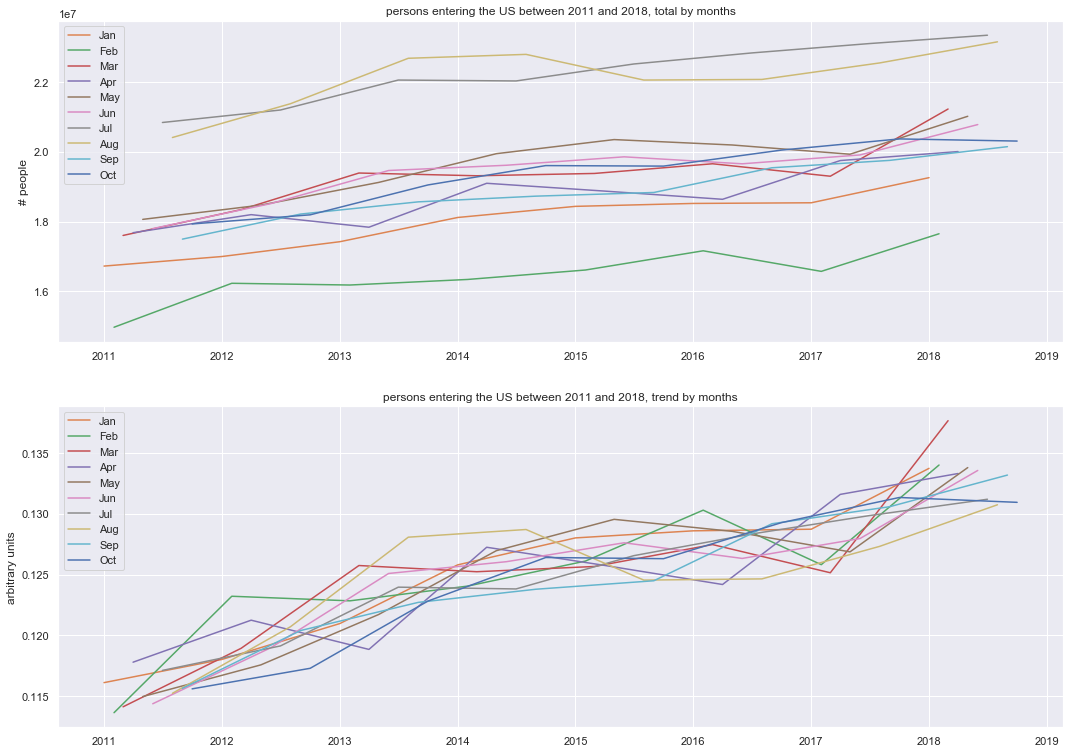

In [129]:
start = '2011'
end = '2018'
pcsm = people_crossing_series.loc[start:end]

fig, ax = plt.subplots(2,figsize = (18,13))

for i in range(11) :
    mm = pcsm[pcsm.index.month == i] 
    ax[0].plot(mm, label = calendar.month_abbr[i])
    ax[1].plot(mm/mm.sum(), label = calendar.month_abbr[i])
    
ax[0].set(title = 'persons entering the US between {} and {}, total by months'.format(start, end),
         ylabel = '# people')
ax[1].set(title = 'persons entering the US between {} and {}, trend by months'.format(start, end),
         ylabel = 'arbitrary units')
ax[0].legend()
ax[1].legend()

plt.show()

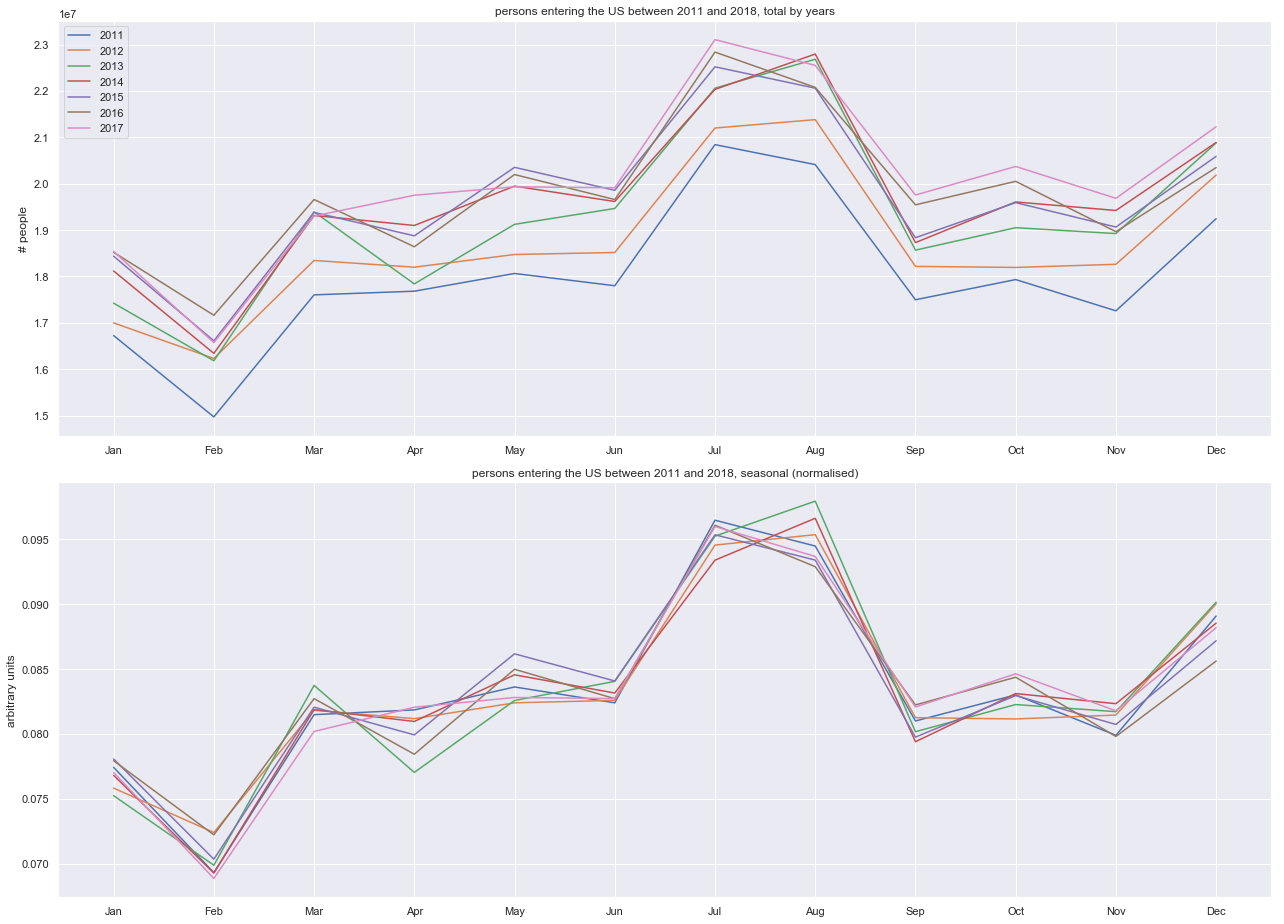

In [130]:
start = '2011'
end = '2018'
pcsm = people_crossing_series.loc[start:end]
months = [calendar.month_abbr[m] for m in range(1,13)]
fig, ax = plt.subplots(2,figsize = (18,13))

start = int(start)
end = int(end)

for i in range(start, end) :
    yy = pcsm[pcsm.index.year == i];
    yy = yy.set_index(yy.index.month);
    ax[0].plot(yy
               , label = i)
    ax[1].plot(yy/yy.sum()
               , label = i)
    
ax[0].set(title = 'persons entering the US between {} and {}, total by years'.format(start, end),
         ylabel = '# people')

ax[1].set(title = 'persons entering the US between {} and {}, seasonal (normalised)'.format(start, end),
         ylabel = 'arbitrary units')
plt.setp(ax, xticks = range(1,13), xticklabels = months)
ax[0].legend()
plt.tight_layout()

plt.show()


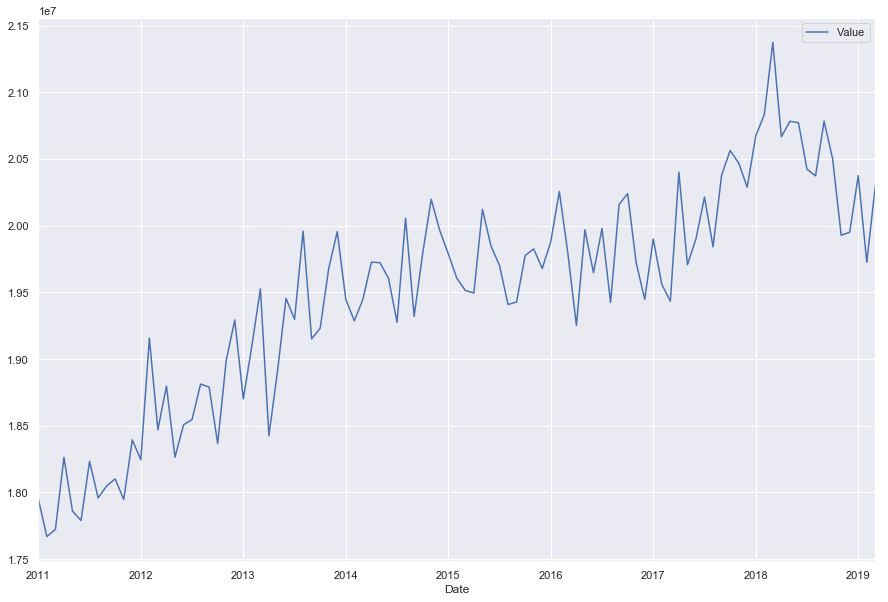

In [132]:

des = res_mul.trend * res_mul.resid
des.plot(figsize = (15,10))

plt.show()

In [134]:
result_diff = adfuller(des.diff().Value.dropna())
print('ADF Statistic: %f' % result_diff[0])
print('p-value: %f' % result_diff[1])

ADF Statistic: -9.019418
p-value: 0.000000


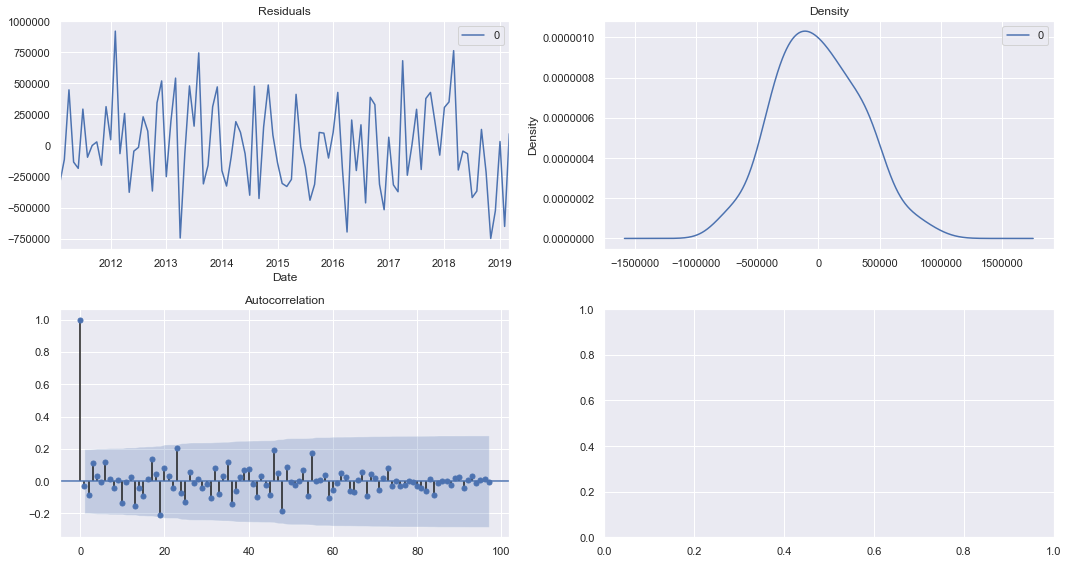

In [138]:
# Plot residual errors

residuals = pd.DataFrame(model_fit.resid)

fig, ax = plt.subplots(2,2, figsize=(15,8))
residuals.plot(title="Residuals", ax=ax[0,0])
residuals.plot(kind='kde', title='Density', ax=ax[0,1])
plot_acf(model_fit.resid.dropna(), ax=ax[1,0])
plt.tight_layout()
plt.show()

In [140]:
print(len(des))
print(len(des)*.75)

99
74.25
